In [2]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_image, train_label), (test_image,test_label) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
train_image.shape
type(train_image)

numpy.ndarray

In [5]:
train_image[0,23,23]

194

In [6]:
train_label.shape
train_label[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
class_names = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandle', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

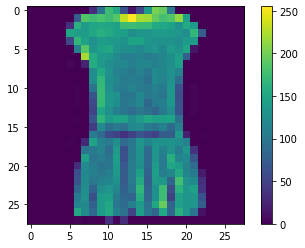

In [8]:
plt.figure()
plt.imshow(train_image[3])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_image = train_image / 255.0
test_image = test_image / 255.0

In [10]:
train_image

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [11]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)), keras.layers.Dense(128,activation='relu'), keras.layers.Dense(10,activation='softmax')])

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(train_image,train_label,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5014 - accuracy: 0.8237
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3771 - accuracy: 0.8634
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3393 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3139 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2953 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2822 - accuracy: 0.8951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2685 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2582 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2500 - accuracy: 0.9063
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.241

In [14]:

test_loss, test_acc = model.evaluate(test_image,test_label,verbose=1)
test_loss, test_acc

313/313 [==============================] - 0s 1ms/step - loss: 0.3524 - accuracy: 0.8797


(0.3524358570575714, 0.8797000050544739)

In [15]:
predictions = model.predict(test_image)

Ankle Boot


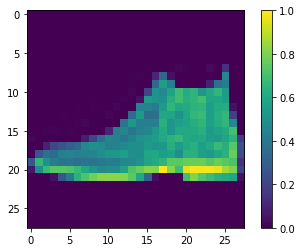

In [16]:
print(class_names[np.argmax(predictions[0])])
plt.figure()
plt.imshow(test_image[0])
plt.colorbar()
plt.show()

In [18]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

In [31]:
def predict(model, image, correct_label):
  class_names = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandle', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]
  show_image(image,class_names[correct_label],predicted_class)

def show_image(img,label,guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.colorbar()
  plt.grid(False)
  plt.title("Expected : " + label)
  plt.xlabel("Guess : " + guess)
  plt.show()

def getNum():
  num = input("Pick a number : ")
  if num.isdigit():
    num = int(num)
    if 0 <= num <= 4000:
      return num
  else:
    print("Try again")

Pick a number : 78


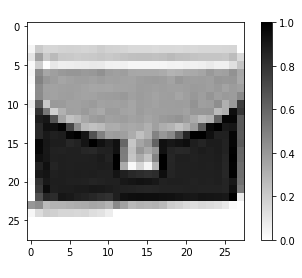

In [32]:
num = getNum()
image = test_image[num]
label = test_label[num]

predict(model, image, label)